In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import tweepy
import json
from config import consumer_key, consumer_secret, access_token, access_token_secret
from datetime import datetime
import pandas as pd
import numpy as np

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User
target_user = ["BBC", "CBS", "CNN", "FoxNews", "nytimes"]

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_time = []
tweet_text_list = []
screen_name = []

for user in target_user:
    for x in range(1, 6):
        
        public_tweets = api.user_timeline(user, page=x)
    
        for tweet in public_tweets:

            results = analyzer.polarity_scores(tweet["text"])
            raw_time = tweet["created_at"]
            screenname = tweet["user"]["screen_name"]
            compound = results["compound"]
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            tweet_text = tweet["text"]
            
            screen_name.append(screenname)
            tweet_time.append(raw_time)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweet_text_list.append(tweet_text)
print(tweet_text_list[0])

RT @BBCOne: “I see women out with their babies walking around like it’s nothing… I just want to yell out at them, “You’re amazing!” @Jenna_…


In [3]:
converted_timestamps = []
for raw_time in tweet_time:
    # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    # http://strftime.org/
    converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
    converted_timestamps.append(converted_time)
print(converted_timestamps[0])

2018-09-30 20:21:03+00:00


In [4]:
twtago = list(range(0,100))*5
tweet_data = {"Source": screen_name,
             "Text": tweet_text_list,
             "Date": converted_timestamps,
             "Compound": compound_list,
             "Positive": positive_list,
             "Neutral": neutral_list,
             "Negative": negative_list,
             "Tweets Ago": twtago}

tweet_data_df = pd.DataFrame(tweet_data)
tweet_data_df

,Source,Text,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,BBC,RT @BBCOne: “I see women out with their babies...,2018-09-30 20:21:03+00:00,0.4753,0.157,0.843,0.000,0
1,BBC,RT @bbcstrictly: Wow. #Strictly Movie Week loo...,2018-09-30 19:39:53+00:00,0.6239,0.313,0.687,0.000,1
2,BBC,A mother’s life disintegrates while the world ...,2018-09-30 19:03:02+00:00,0.0000,0.000,1.000,0.000,2
3,BBC,Tonight it's the first @BBCStrictly results sh...,2018-09-30 17:16:03+00:00,0.0000,0.000,1.000,0.000,3
4,BBC,"RT @BBCOne: #TheCry ""is the perfect replacemen...",2018-09-30 16:22:42+00:00,0.5106,0.167,0.769,0.063,4
5,BBC,"RT @BBCOne: To mark 30 years in music, we’re m...",2018-09-30 16:22:25+00:00,0.4574,0.125,0.875,0.000,5
6,BBC,🕺✨ @Joe_Sugg says he worried that he was the '...,2018-09-30 16:01:09+00:00,0.0000,0.113,0.773,0.113,6
7,BBC,This is the incredible story of how London dug...,2018-09-30 15:03:03+00:00,0.0000,0.000,1.000,0.000,7
8,BBC,"In Japan, 'aki no koe' refers to autumn's voic...",2018-09-30 14:02:04+00:00,-0.2960,0.000,0.901,0.099,8
9,BBC,"""Dyslexia tries to kick my butt daily - but I ...",2018-09-30 13:06:04+00:00,0.0000,0.000,1.000,0.000,9


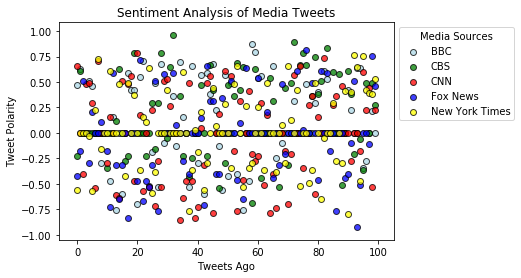

In [5]:
bbc = tweet_data_df[tweet_data_df["Source"] == "BBC"]
cbs = tweet_data_df[tweet_data_df["Source"] == "CBS"]
cnn = tweet_data_df[tweet_data_df["Source"] == "CNN"]
fox = tweet_data_df[tweet_data_df["Source"] == "FoxNews"]
nyt = tweet_data_df[tweet_data_df["Source"] == "nytimes"]

plt.scatter(x=bbc["Tweets Ago"], y=bbc["Compound"],marker="o", c="lightblue", edgecolors="black", alpha = 0.75, label="BBC")
plt.scatter(x=cbs["Tweets Ago"], y=cbs["Compound"],marker="o", c="green", edgecolors="black", alpha = 0.75, label="CBS")
plt.scatter(x=cnn["Tweets Ago"], y=cnn["Compound"],marker="o", c="red", edgecolors="black", alpha = 0.75, label="CNN")
plt.scatter(x=fox["Tweets Ago"], y=fox["Compound"],marker="o", c="blue", edgecolors="black", alpha = 0.75, label="Fox News")
plt.scatter(x=nyt["Tweets Ago"], y=nyt["Compound"],marker="o", c="yellow", edgecolors="black", alpha = 0.75, label="New York Times")

# Create a legend
plt.legend(title="Media Sources",bbox_to_anchor = (1,1.00))

# Incorporate a text label regarding circle size
plt.title("Sentiment Analysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# Save Figure
fig1 = plt.gcf()
fig1.savefig("../SentimentAnalysisofTweets.png",bbox_inches='tight')

# Show Figure
plt.show()

In [6]:
bar_graph_source = ["BBC", "CBS", "CNN", "Fox", "NYT"]
bar_graph_compound = [np.mean(bbc["Compound"]),
                     np.mean(cbs["Compound"]),
                     np.mean(cnn["Compound"]),
                     np.mean(fox["Compound"]),
                     np.mean(nyt["Compound"])]

bar_graph = {"Source": bar_graph_source, "Average Compound": bar_graph_compound}

bar_graph_df = pd.DataFrame(bar_graph)
bar_graph_df.head()

,Source,Average Compound
0,BBC,0.102244
1,CBS,0.147831
2,CNN,-0.019134
3,Fox,-0.023140
4,NYT,0.030725


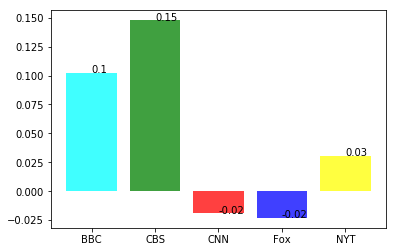

<Figure size 432x288 with 0 Axes>

In [8]:
labels = [i for i in bar_graph_compound]
plt.bar(bar_graph_source, bar_graph_compound, color=['cyan', 'green', 'red', 'blue', 'yellow'], alpha=0.75, align="center")
for a,b in zip(bar_graph_source, bar_graph_compound):
    plt.text(a, b, str(round(b,2)))
plt.show()

# Save Figure
fig2 = plt.gcf()
fig2.savefig("../SentimentAnalysisofTweets2.png",bbox_inches='tight')

In [ ]:
#CBS had the largest positive compound score for its 100 tweets.
#Both CNN and Fox had overall negative compound scores.
#A large portion of tweets for every outlet had net zero compound scores.